<a href="https://colab.research.google.com/github/shaik-moinahmed78/ipl.data-_anlysis/blob/main/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
ipl_matches_df=pd.read_csv('matches.csv')

In [ ]:
ipl_matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
ipl_matches_df.shape

(756, 18)

In [ ]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
ipl_matches_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
ipl_matches_df.isna().any()

id                 False
Season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [ ]:
ipl_matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
ipl_matches_df['id'].count()

756

In [ ]:
ipl_matches_df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [ ]:
ipl_matches_df['win_by_runs'].max()

146

In [ ]:
ipl_matches_df['win_by_runs'].idxmax()

43

In [ ]:
df=ipl_matches_df

In [ ]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [ ]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [ ]:
df.groupby(['Season', 'city']).groups

{('IPL-2017', 'Hyderabad'): [0, 5, 18, 20, 35, 42, 46, 58], ('IPL-2017', 'Pune'): [1, 8, 24, 28, 32, 37, 53], ('IPL-2017', 'Rajkot'): [2, 12, 19, 25, 33], ('IPL-2017', 'Indore'): [3, 7, 21], ('IPL-2017', 'Bangalore'): [4, 11, 16, 29, 41, 44, 56, 57], ('IPL-2017', 'Mumbai'): [6, 9, 15, 23, 27, 36, 49, 55], ('IPL-2017', 'Kolkata'): [10, 13, 22, 26, 30, 39, 52], ('IPL-2017', 'Delhi'): [14, 17, 38, 40, 43, 50, 54], ('IPL-2017', 'Chandigarh'): [31, 34, 45, 47], ('IPL-2017', 'Kanpur'): [48, 51], ('IPL-2008', 'Bangalore'): [59, 69, 73, 83, 89, 103, 110], ('IPL-2008', 'Chandigarh'): [60, 68, 72, 80, 93, 96, 107], ('IPL-2008', 'Delhi'): [61, 75, 86, 97, 99, 108], ('IPL-2008', 'Mumbai'): [62, 71, 81, 85, 95, 98, 105, 114, 115, 116], ('IPL-2008', 'Kolkata'): [63, 74, 87, 94, 102, 104, 111], ('IPL-2008', 'Jaipur'): [64, 77, 82, 88, 92, 100, 112], ('IPL-2008', 'Hyderabad'): [65, 67, 76, 79, 91, 101, 113], ('IPL-2008', 'Chennai'): [66, 70, 78, 84, 90, 106, 109], ('IPL-2009', 'Cape Town'): [117, 118,

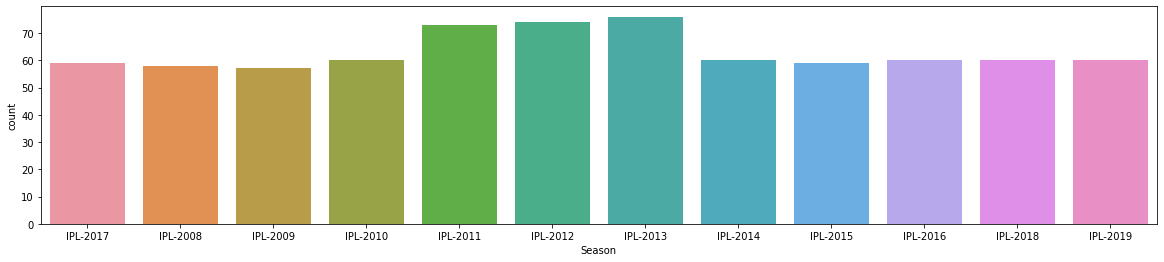

In [ ]:
fig_dims = (20,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Season',ax=ax,data=df)
plt.show()

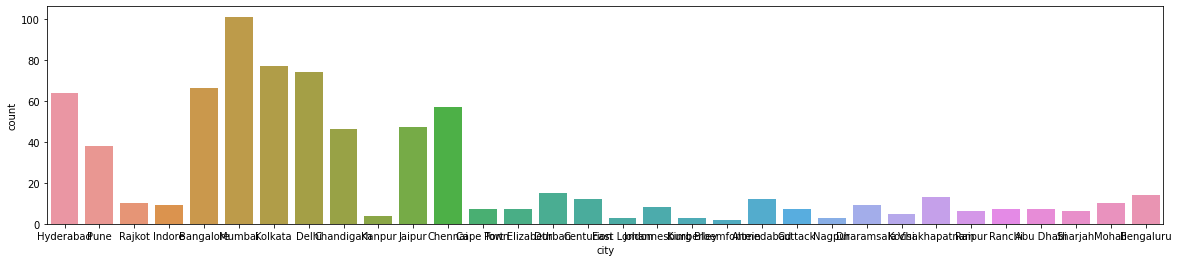

In [ ]:
fig_dims = (20,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='city',ax=ax,data=df)
plt.show()

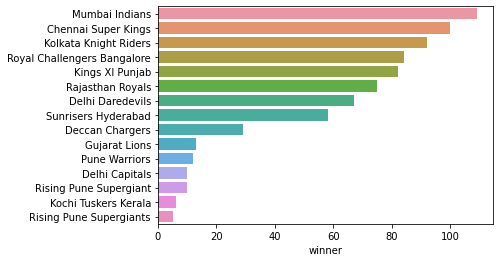

In [ ]:
data=df.winner.value_counts()
sns.barplot(y = data.index, x=data)

In [ ]:
probability_of_win = df['toss_winner'] == df['winner']

In [ ]:
probability_of_win.groupby(probability_of_win).size()

False    363
True     393
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


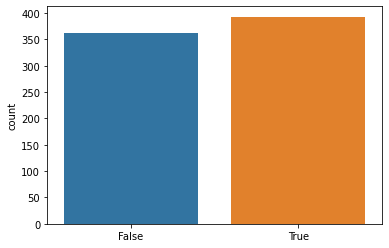

In [ ]:
sns.countplot(probability_of_win)

In [ ]:
pd.set_option('max_rows',99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
df.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
          Kolkata Knight Riders           6
          Royal Challengers Bangalore     4
          Deccan Chargers                 2
IPL-2009  Delhi Daredevils               10
          Deccan Chargers                 9
          Royal Challengers Bangalore     9
          Chennai Super Kings             8
          Kings XI Punjab                 7
          Rajasthan Royals                6
          Mumbai Indians                  5
          Kolkata Knight Riders           3
IPL-2010  Mumbai Indians                 11
          Chennai Super Kings             9
          Deccan Chargers                 8
          Royal Challengers Bangalore     8
          Delhi Daredevils                7
          Kolkata Knight Riders       

In [ ]:
df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [ ]:
df['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
MS Dhoni             17
DA Warner            17
RG Sharma            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
V Kohli              12
AM Rahane            12
DR Smith             11
V Sehwag             11
AD Russell           11
A Mishra             11
JH Kallis            10
KA Pollard           10
AT Rayudu             9
SE Marsh              9
SP Narine             9
UT Yadav              8
RA Jadeja             8
SR Tendulkar          8
Harbhajan Singh       8
AC Gilchrist          7
RV Uthappa            7
Rashid Khan           7
SL Malinga            6
RR Pant               6
M Vijay               6
A Nehra               6
BJ Hodge              6
S Dhawan              6
HH Pandya             6
JC Buttler            5
PA Patel              5
DPMD Jayawardene      5
JP Faulkner           5
Sandeep Sharma        5
Yuvraj Singh          5
KC Sangakkara   

In [ ]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Abu Dhabi           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
df1=pd.read_csv('deliveries.csv')

In [ ]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
df.shape

(756, 18)

In [ ]:
print('Total Matches Played:',df.shape[0])
print(' \n Venues Played At:',df['city'].unique())     
print(' \n Teams :',df['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [ ]:
df['Season'] = pd.DatetimeIndex(df['date']).year

df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match_per_season=df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
colors = ['turquoise',] * 13
colors[5] = 'crimson'

fig=px.bar(data_frame=match_per_season,x=match_per_season.Season,y=match_per_season.matches,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="Number of matches played in different seasons ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
df1.columns.to_list()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [ ]:
df.columns.to_list()

['id',
 'Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [ ]:
season_data=df[['id','Season']].merge(df1,left_on="id", right_on="match_id", how='left',).drop("id", axis = 1)
season_data.head()

,Season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
fig = px.line(p, x=p.index, y="total_runs")
fig.update_layout(title="Total Runs Across the Seasons ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.show()

In [ ]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season.style.background_gradient(cmap='PuBu',subset=['Runs scored per match'])

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


In [ ]:
fig = px.line(runs_per_season, x=runs_per_season.index, y="Runs scored per match")
fig.update_layout(title="Runs scored per match across seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.show()

In [ ]:
ump=pd.concat([df['umpire1'],df['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()
ump.head(10)

S Ravi             106
HDPK Dharmasena     87
C Shamshuddin       73
AK Chaudhary        58
SJA Taufel          55
M Erasmus           54
Asad Rauf           51
BR Doctrove         42
Nitin Menon         42
CK Nandan           41
dtype: int64

In [ ]:
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [ ]:
toss=df['toss_winner'].value_counts()
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar( y=toss,x=toss.index,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="No. of tosses won by each team",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
temp_series = df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
values = (np.array((temp_series / temp_series.sum())*100))
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Toss decision percentage",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
fig=px.histogram(data_frame=df,x='Season',color='toss_decision',color_discrete_sequence=colors,barmode='group')
fig.update_layout(title="Toss decision in different seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1)
fig.show()

In [ ]:
df['toss_win_game_win'] = np.where((df.toss_winner == df.winner),'Yes','No')
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_game_win
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,No
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Yes
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Yes
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Yes
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Yes


In [ ]:
labels =["Yes",'No']
values = df['toss_win_game_win'].value_counts()
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Winning toss implies winning macthes?",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
winning_teams = df[['Season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.Season.unique()):
    winners_team[i] = winning_teams[winning_teams.Season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

In [ ]:
winners_of_IPL.value_counts().index

MultiIndex([(       'Mumbai Indians',),
            (  'Chennai Super Kings',),
            ('Kolkata Knight Riders',),
            (  'Sunrisers Hyderabad',),
            (     'Rajasthan Royals',),
            (      'Deccan Chargers',)],
           names=['team'])

In [ ]:
colors = ['turquoise',] * 6
colors[0] = 'crimson'
fig=px.bar( y=winners_of_IPL['team'].value_counts(),x=winners_of_IPL['team'].value_counts().index,labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Winners of IPL",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
matches_played_byteams=pd.concat([df['team1'],df['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Team Name,Total Matches played
0,Mumbai Indians,187
1,Royal Challengers Bangalore,180
2,Kolkata Knight Riders,178
3,Kings XI Punjab,176
4,Chennai Super Kings,164
5,Delhi Daredevils,161
6,Rajasthan Royals,147
7,Sunrisers Hyderabad,108
8,Deccan Chargers,75
9,Pune Warriors,46


In [ ]:
wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [ ]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu',subset=['% Win'])

,Team Name,Total Matches played,Wins,% Win
0,Delhi Capitals,16,10,62.500000
1,Rising Pune Supergiant,16,10,62.500000
2,Chennai Super Kings,164,100,60.975610
3,Mumbai Indians,187,109,58.288770
4,Sunrisers Hyderabad,108,58,53.703704
5,Kolkata Knight Riders,178,92,51.685393
6,Rajasthan Royals,147,75,51.020408
7,Royal Challengers Bangalore,180,84,46.666667
8,Kings XI Punjab,176,82,46.590909
9,Gujarat Lions,30,13,43.333333


In [ ]:
colors = ['turquoise',] * 15
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Total Matches played'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total number of matches played",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
colors = ['turquoise',] * 15
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Wins'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total Win by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
colors = ['turquoise',] * 15
colors[-4] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['% Win'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win % by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
def lucky(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(10)

In [ ]:
mi=lucky(df,'Mumbai Indians')
values = mi
labels=mi.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for MI:",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
rcb=lucky(df,'Royal Challengers Bangalore')
values = mi
labels=mi.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for RCB:",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
csk=lucky(df,'Chennai Super Kings')
values = csk
labels=csk.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for CSK:",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
def comparison(team1,team2):
    compare=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    fig=px.histogram(data_frame=compare,x='Season',color='winner',labels=dict(x="Team Name",y="Count"),barmode='group',nbins=16,color_discrete_sequence=colors,)
    fig.update_layout(title="Team Comparision:",
                      titlefont={'size': 26},template='simple_white'     
                      )
    fig.update_traces(marker_line_color='black',
                      marker_line_width=2.5, opacity=1)
    fig.show()

In [ ]:
comparison('Mumbai Indians','Chennai Super Kings')

In [ ]:
filt=(df1['batsman']=='V Kohli')
df_kohli=df1[filt]
df_kohli.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
values = df_kohli['dismissal_kind'].value_counts()
labels=df_kohli['dismissal_kind'].value_counts().index
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Dismissal Type",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
len(df_kohli[df_kohli['batsman_runs']==4])

482

In [ ]:
len(df_kohli[df_kohli['batsman_runs']==6])

191

In [ ]:
df_kohli['total_runs'].sum()

5616

In [ ]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [ ]:
print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

Runs scored from 1's : 1741
Runs scored from 2's : 586
Runs scored from 3's : 33
Runs scored from 4's : 1928
Runs scored from 6's : 1146


In [ ]:
values=[1919,692,39,2016,1212]
labels=[1,2,3,4,6]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Virat Kohli total runs contribution",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
runs=df1.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs.head()

,inning,batting_team,total_runs
0,1,Sunrisers Hyderabad,207
1,2,Royal Challengers Bangalore,172
2,1,Mumbai Indians,184
3,2,Rising Pune Supergiant,187
4,1,Gujarat Lions,183


In [ ]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

In [ ]:
fig = px.box(y='total_runs',x='batting_team',data_frame=inning1,color='batting_team')

fig.update_layout(title="Batting First",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In [ ]:
fig = px.box(y='total_runs',x='batting_team',data_frame=inning2,color='batting_team')

fig.update_layout(title="Batting Second",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In [ ]:
high_scores=df1.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
score_200=high_scores[high_scores['total_runs']>=200]
score_200.head(5)

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
16,9,1,Delhi Daredevils,Rising Pune Supergiant,205
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213
62,32,1,Sunrisers Hyderabad,Kings XI Punjab,207
72,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209


In [ ]:
x1=score_200['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,batting_team
Royal Challengers Bangalore,19
Chennai Super Kings,17
Kings XI Punjab,15
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,10
Rajasthan Royals,8
Delhi Daredevils,7
Deccan Chargers,1
Delhi Capitals,1


In [ ]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=x1.index,y=x1['batting_team'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total count of 200+ by batting team",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
z=score_200['bowling_team'].value_counts()
z=pd.DataFrame(z)
z.style.background_gradient(cmap='PuBu')

,bowling_team
Kings XI Punjab,21
Royal Challengers Bangalore,15
Chennai Super Kings,12
Rajasthan Royals,12
Delhi Daredevils,12
Kolkata Knight Riders,10
Mumbai Indians,8
Sunrisers Hyderabad,8
Gujarat Lions,3
Deccan Chargers,2


In [ ]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=z.index,y=z['bowling_team'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total count of 200+ conceded by bowling team",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
high_200=df1.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['match_id'],inplace=True)

In [ ]:
high_200['total_runs'].max()

263

In [ ]:
balls_played=df1.groupby(['batsman'])['ball'].count().reset_index()
balls_played.sort_values(by='ball',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,batsman,ball
486,V Kohli,4211
428,SK Raina,4044
367,RG Sharma,3816
392,S Dhawan,3776
147,G Gambhir,3524
384,RV Uthappa,3492
112,DA Warner,3398
290,MS Dhoni,3318
42,AM Rahane,3215
92,CH Gayle,3131


In [ ]:
runs=df1.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style.background_gradient(cmap='PuBu')

,Batsman,runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [ ]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=y['Batsman'],y=y['runs'],labels=dict(x="Player",y="Total Runs"),)
fig.update_layout(title="Top 10 leading run-scrorer",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
balls_played=balls_played.merge(runs,left_on='batsman',right_on='Batsman',how='outer')
four=df1[df1['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,4s
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


In [ ]:
six=df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


In [ ]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ball']*100
player['4s'].fillna(0,inplace=True)
player.isnull().values.any()

False

In [ ]:
player.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
67,B Stanlake,5,2,7.0,0,250.000000
485,Umar Gul,39,19,0.0,5,205.263158
381,RS Sodhi,4,2,9.0,0,200.000000
407,S Sharma,8,4,5.0,0,200.000000
34,AD Russell,1445,803,24.0,119,179.950187
456,Shahid Afridi,81,46,0.0,6,176.086957
169,I Malhotra,7,4,10.0,0,175.000000
391,S Curran,95,55,2.0,3,172.727273
209,K Gowtham,148,86,2.0,10,172.093023
437,SN Thakur,36,21,0.0,1,171.428571


In [ ]:
sr=player[player.ball > 100]
sr.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
34,AD Russell,1445,803,24.0,119,179.950187
248,M Ali,311,183,11.0,23,169.945355
441,SP Narine,803,481,0.0,44,166.943867
75,BCJ Cutting,240,146,128.0,19,164.383562
374,RR Pant,1792,1104,6.0,94,162.318841
305,N Pooran,177,110,6.0,14,160.909091
180,J Bairstow,468,293,178.0,18,159.726962
102,CR Brathwaite,188,120,2.0,16,156.666667
153,GJ Maxwell,1403,902,69.0,91,155.543237
93,CH Morris,520,339,1.0,27,153.392330


In [ ]:
reqsr=sr.drop(columns=['runs','ball','4s','6s'],axis=1)
reqsr.sort_values(by='strike_rate',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,Batsman,strike_rate
34,AD Russell,179.950187
248,M Ali,169.945355
441,SP Narine,166.943867
75,BCJ Cutting,164.383562
374,RR Pant,162.318841
305,N Pooran,160.909091
180,J Bairstow,159.726962
102,CR Brathwaite,156.666667
153,GJ Maxwell,155.543237
93,CH Morris,153.392330


In [ ]:
df1['dismissal_kind'].unique()
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
hwt=df1[df1["dismissal_kind"].isin(dismissal_kinds)]
bo=hwt['bowler'].value_counts()

In [ ]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=bo[:10].index,y=bo[:10],labels=dict(x="Bowler",y="Total Wickets"),)
fig.update_layout(title="Leading wicket-takers",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=df['venue'].value_counts()[:10].index,y=df['venue'].value_counts()[:10],labels=dict(x="Venue",y="Match count"),)
fig.update_layout(title="Matches played at different stadiums",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=df.player_of_match.value_counts()[:10].index,y=df.player_of_match.value_counts()[:10],labels=dict(x="Players",y="Count"),)
fig.update_layout(title="Top 10 MOM awardee",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
data_4 = df['Season'].unique()

fours_list = []
for var in data_4:
    new_df = df[df['Season']==var]
    total_fours = 0
    for i in new_df['id'].values:
        temp_df = df1[df1['match_id']==i]
        fours = temp_df[temp_df['batsman_runs']==4]['batsman_runs'].count()
        total_fours+=fours
    fours_list.append(total_fours)
    

colors = ['turquoise',] * 14
colors[5] = 'crimson'
fig=px.bar(x=data_4, y=fours_list,labels=dict(x="Season",y="Total Fours"),)
fig.update_layout(title="Total number of Fours in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
data_6 = df['Season'].unique()

# Getting total sixes from each season by check id from matches dataset in deliveries dataset.
sixes_list = []
for var in data_6:
    new_df = df[df['Season']==var]
    total_sixes = 0
    for i in new_df['id'].values:
        temp_df = df1[df1['match_id']==i]
        sixes = temp_df[temp_df['batsman_runs']==6]['batsman_runs'].count()
        total_sixes+=sixes
    sixes_list.append(total_sixes)
    
colors = ['turquoise',] * 14
colors[-4] = 'crimson'
fig=px.bar(x=data_4, y=sixes_list,labels=dict(x="Season",y="Total Sixes"),)
fig.update_layout(title="Total number of Sixes in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
runs4=np.dot(fours_list,4)
runs6=np.dot(sixes_list,6)

In [ ]:
k=runs4+runs6
Y=df['Season'].unique()
colors = ['turquoise',] * 14
colors[5] = 'crimson'
fig=px.bar(x=Y,y=k,labels=dict(x="Season",y="Total runs"),)
fig.update_layout(title="Total number of runs scored from boundaries in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
totruns=np.array(season['total_runs'])
res=(k/totruns)*100

In [ ]:
res

array([59.56402966, 64.51415642, 44.12434465, 48.9647348 , 51.20919254,
       53.27847093, 64.98336063, 57.44020051, 56.1764394 , 55.17938891,
       57.51955955, 56.28021707])

In [ ]:
colors = ['turquoise',] * 14
colors[10] = 'crimson'
fig=px.bar(x=Y,y=res,labels=dict(x="Season",y="Percentage"),)
fig.update_layout(title="Total contribution of runs from boundaries in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
team = df1['batting_team'].unique()
team_runs = []
for var in team:
    temp_df = df1[df1['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([0,1,2,3,4,5])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In First 6 Overs'])
#team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team.index.name = 'Team'

colors = ['turquoise',] * 15
colors[6] = 'crimson'
fig=px.bar(x=team.index,y=team['Runs In First 6 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier first 6 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
team1 = df1['batting_team'].unique()
team_runs1 = []
for var in team1:
    temp_df=df1[df1['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([19,18,17,16])]
    runs1 = temp_df['total_runs'].sum()
    team_runs1.append(runs1)
team1 = pd.DataFrame(data=team_runs1, index=team1,columns=['Runs In Last 4 Overs'])
# team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team1.index.name = 'Team'
colors = ['turquoise',] * 15
colors[6] = 'crimson'
fig=px.bar(x=team1.index,y=team1['Runs In Last 4 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier last 4 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
played1=played.merge(team,left_on='Team Name',right_on='Team',how='inner')
played3=played1.merge(team1,left_on='Team Name',right_on='Team',how='inner')
mintoover=np.dot(played3['Total Matches played'],6)
mintoover1=np.dot(played3['Total Matches played'],4)
played3['RR in first 6 overs']=(played3['Runs In First 6 Overs']/mintoover)
played3['RR in last 4 overs']=(played3['Runs In Last 4 Overs']/mintoover1)
played3

,Team Name,Total Matches played,Wins,% Win,Runs In First 6 Overs,Runs In Last 4 Overs,RR in first 6 overs,RR in last 4 overs
0,Chennai Super Kings,164,100,60.975610,6056,6088,6.154472,9.280488
1,Deccan Chargers,75,29,38.666667,2819,2577,6.264444,8.590000
2,Delhi Capitals,16,10,62.500000,706,555,7.354167,8.671875
3,Delhi Daredevils,161,67,41.614907,6189,5109,6.406832,7.933230
4,Gujarat Lions,30,13,43.333333,1265,975,7.027778,8.125000
5,Kings XI Punjab,176,82,46.590909,6757,5924,6.398674,8.414773
6,Kochi Tuskers Kerala,14,6,42.857143,537,314,6.392857,5.607143
7,Kolkata Knight Riders,178,92,51.685393,6974,6014,6.529963,8.446629
8,Mumbai Indians,187,109,58.288770,6885,6876,6.136364,9.192513
9,Pune Warriors,46,12,26.086957,1567,1395,5.677536,7.581522


In [ ]:
colors = ['turquoise',] * 15
colors[4] = 'crimson'
fig=px.bar(x=played3['Team Name'],y=played3['RR in first 6 overs'],labels=dict(x="Team Name",y="Run Rate"),)
fig.update_layout(title="Run Rate in first 6 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar(x=played3['Team Name'],y=played3['RR in last 4 overs'],labels=dict(x="Team Name",y="Run Rate"),)
fig.update_layout(title="Run Rate in last 4 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()